In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [100]:
path1= './data/urban-core.csv'
path2= './data/urban-mix.csv'
path3= './data/Adj(urban-core).csv'
path4= './data/Adj(urban-mix).csv'

In [101]:
# Urban_core data
urban_core=pd.read_csv(path1,header=None)
urban_core_speed =urban_core.iloc[:,7:]
core_adj_matrix = pd.read_csv(path3, header=None)

# Urban_mix data
urban_mix=pd.read_csv(path2,header=None)
urban_mix_speed =urban_mix.iloc[:,7:]
mix_adj_matrix = pd.read_csv(path4, header=None)

In [102]:
urban_core_speed.transpose()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
7,49.39,53.34,39.47,29.02,48.33,79.50,26.99,31.70,24.62,32.14,...,26.80,25.07,41.75,58.12,31.64,46.22,57.24,59.56,61.14,60.86
8,49.74,52.38,39.22,34.66,46.12,74.67,26.99,31.06,22.99,29.55,...,21.23,23.33,42.06,54.53,35.11,44.86,56.30,57.49,60.25,62.20
9,48.69,53.20,38.84,34.49,50.23,67.31,26.99,31.06,25.78,21.71,...,27.14,25.60,43.72,52.46,32.18,47.40,57.34,59.51,59.74,63.40
10,49.04,53.53,34.21,42.51,45.12,69.33,33.91,38.00,23.47,29.62,...,24.90,26.92,47.03,54.95,32.54,44.94,54.87,59.44,63.45,60.90
11,50.71,52.62,44.50,36.78,51.00,54.06,30.74,29.00,31.81,28.61,...,28.82,24.73,40.56,55.65,35.83,44.18,56.96,60.52,61.89,63.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,48.96,50.70,34.78,30.38,47.16,48.57,18.68,20.03,25.44,25.80,...,24.35,20.27,43.44,55.12,23.10,41.70,57.12,47.92,59.50,58.09
8643,49.44,50.95,35.94,48.38,48.07,49.90,18.10,20.91,26.46,29.08,...,30.51,21.76,44.34,56.08,30.24,40.72,55.97,49.52,61.51,58.19
8644,48.72,51.55,36.47,36.53,46.30,50.41,16.00,26.91,27.42,29.70,...,23.44,25.30,50.41,60.92,27.86,37.27,58.98,52.32,59.59,56.26
8645,49.80,52.99,34.78,33.29,47.90,52.74,21.87,28.63,29.11,27.65,...,23.34,27.91,44.67,55.34,27.22,42.97,57.34,50.18,60.62,60.79


# Preprocessing

In [103]:
# 시작 날짜와 시간 설정
start_date = '2018-04-01 00:00'

# 종료 날짜와 시간 설정
end_date = '2018-04-30 23:55'

# 5분 간격으로 datetime 인덱스 생성
datetime_index = pd.date_range(start=start_date, end=end_date, freq='5T')

# 결과 출력
datetime_index

DatetimeIndex(['2018-04-01 00:00:00', '2018-04-01 00:05:00',
               '2018-04-01 00:10:00', '2018-04-01 00:15:00',
               '2018-04-01 00:20:00', '2018-04-01 00:25:00',
               '2018-04-01 00:30:00', '2018-04-01 00:35:00',
               '2018-04-01 00:40:00', '2018-04-01 00:45:00',
               ...
               '2018-04-30 23:10:00', '2018-04-30 23:15:00',
               '2018-04-30 23:20:00', '2018-04-30 23:25:00',
               '2018-04-30 23:30:00', '2018-04-30 23:35:00',
               '2018-04-30 23:40:00', '2018-04-30 23:45:00',
               '2018-04-30 23:50:00', '2018-04-30 23:55:00'],
              dtype='datetime64[ns]', length=8640, freq='5T')

In [104]:
urban_core_speed = urban_core_speed.transpose()
urban_core_speed.index = datetime_index


In [105]:
urban_core_speed.to_csv('./data/urban_core_speed.csv', index=True)

In [106]:
df = pd.read_csv('./data/urban_core_speed.csv', index_col=0)
df.index

Index(['2018-04-01 00:00:00', '2018-04-01 00:05:00', '2018-04-01 00:10:00',
       '2018-04-01 00:15:00', '2018-04-01 00:20:00', '2018-04-01 00:25:00',
       '2018-04-01 00:30:00', '2018-04-01 00:35:00', '2018-04-01 00:40:00',
       '2018-04-01 00:45:00',
       ...
       '2018-04-30 23:10:00', '2018-04-30 23:15:00', '2018-04-30 23:20:00',
       '2018-04-30 23:25:00', '2018-04-30 23:30:00', '2018-04-30 23:35:00',
       '2018-04-30 23:40:00', '2018-04-30 23:45:00', '2018-04-30 23:50:00',
       '2018-04-30 23:55:00'],
      dtype='object', length=8640)

In [107]:
urban_mix_speed = urban_mix_speed.transpose()
urban_mix_speed.index = datetime_index

In [108]:
urban_mix_speed.to_csv('./data/urban_mix_speed.csv', index=True)

In [109]:
df = pd.read_csv('./data/urban_mix_speed.csv', index_col=0)
df.index

Index(['2018-04-01 00:00:00', '2018-04-01 00:05:00', '2018-04-01 00:10:00',
       '2018-04-01 00:15:00', '2018-04-01 00:20:00', '2018-04-01 00:25:00',
       '2018-04-01 00:30:00', '2018-04-01 00:35:00', '2018-04-01 00:40:00',
       '2018-04-01 00:45:00',
       ...
       '2018-04-30 23:10:00', '2018-04-30 23:15:00', '2018-04-30 23:20:00',
       '2018-04-30 23:25:00', '2018-04-30 23:30:00', '2018-04-30 23:35:00',
       '2018-04-30 23:40:00', '2018-04-30 23:45:00', '2018-04-30 23:50:00',
       '2018-04-30 23:55:00'],
      dtype='object', length=8640)

# Results

### urban-core

In [12]:
# 시작 날짜와 시간 설정
start_date = '2018-04-25 00:00'

# 종료 날짜와 시간 설정
end_date = '2018-04-30 23:55'

# 5분 간격으로 datetime 인덱스 생성
datetime_index = pd.date_range(start=start_date, end=end_date, freq='5T')

In [13]:
def masked_rmse_np(preds, labels, null_val=np.nan):
    return np.sqrt(masked_mse_np(preds=preds, labels=labels, null_val=null_val))


def masked_mse_np(preds, labels, null_val=np.nan):
    with np.errstate(divide='ignore', invalid='ignore'):
        if np.isnan(null_val):
            mask = ~np.isnan(labels)
        else:
            mask = np.not_equal(labels, null_val)
        mask = mask.astype('float32')
        mask /= np.mean(mask)
        rmse = np.square(np.subtract(preds, labels)).astype('float32')
        rmse = np.nan_to_num(rmse * mask)
        return np.mean(rmse)


def masked_mae_np(preds, labels, null_val=np.nan):
    with np.errstate(divide='ignore', invalid='ignore'):
        if np.isnan(null_val):
            mask = ~np.isnan(labels)
        else:
            mask = np.not_equal(labels, null_val)
        mask = mask.astype('float32')
        mask /= np.mean(mask)
        mae = np.abs(np.subtract(preds, labels)).astype('float32')
        mae = np.nan_to_num(mae * mask)
        return np.mean(mae)


def masked_mape_np(preds, labels, null_val=np.nan):
    with np.errstate(divide='ignore', invalid='ignore'):
        if np.isnan(null_val):
            mask = ~np.isnan(labels)
        else:
            mask = np.not_equal(labels, null_val)
        mask = mask.astype('float32')
        mask /= np.mean(mask)
        mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
        mape = np.nan_to_num(mask * mape)
        return np.mean(mape)

In [14]:
data_core_3 = np.load('data/results/dcrnn_predictions_core_3.npz')

In [15]:
y_pred = data_core_3['prediction']
y_true = data_core_3['truth']

In [16]:
y_pred.shape

(3, 1728, 304)

In [17]:
mae = masked_mae_np(y_pred, y_true)
mape = masked_mape_np(y_pred, y_true)
rmse = masked_rmse_np(y_pred, y_true)

print('MAE: {:.2f}, MAPE: {:.4f}, RMSE: {:.2f}'.format(mae, mape, rmse))

MAE: 2.45, MAPE: 0.0943, RMSE: 3.74


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_m = np.mean(y_pred[2], axis=1)
y_true_m = np.mean(y_true[2], axis=1)

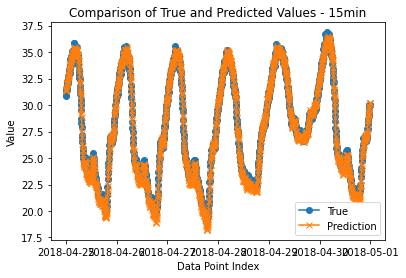

In [19]:
import matplotlib.pyplot as plt

# x축 데이터 생성 (데이터 포인트의 인덱스)
x = datetime_index

# 실제 값과 예측 값 비교를 위한 그래프
plt.plot(x, y_true_m, label='True', marker='o')  # 실제 값
plt.plot(x, y_pred_m, label='Prediction', marker='x')  # 예측 값

# 제목 및 레이블 추가
plt.title('Comparison of True and Predicted Values - 15min')
plt.xlabel('Data Point Index')
plt.ylabel('Value')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [20]:
data_core_6 = np.load('data/results/dcrnn_predictions_core_6.npz')

In [21]:
y_pred = data_core_6['prediction']
y_true = data_core_6['truth']

In [22]:
mae = masked_mae_np(y_pred, y_true)
mape = masked_mape_np(y_pred, y_true)
rmse = masked_rmse_np(y_pred, y_true)

print('MAE: {:.2f}, MAPE: {:.4f}, RMSE: {:.2f}'.format(mae, mape, rmse))

MAE: 2.62, MAPE: 0.1016, RMSE: 3.97


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_m = np.mean(y_pred[5], axis=1)
y_true_m = np.mean(y_true[5], axis=1)

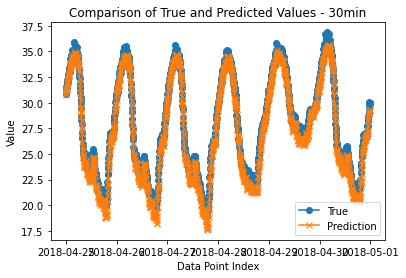

In [24]:
import matplotlib.pyplot as plt

# x축 데이터 생성 (데이터 포인트의 인덱스)
x = datetime_index

# 실제 값과 예측 값 비교를 위한 그래프
plt.plot(x, y_true_m, label='True', marker='o')  # 실제 값
plt.plot(x, y_pred_m, label='Prediction', marker='x')  # 예측 값

# 제목 및 레이블 추가
plt.title('Comparison of True and Predicted Values - 30min')
plt.xlabel('Data Point Index')
plt.ylabel('Value')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [25]:
data_core_12 = np.load('data/results/dcrnn_predictions_core_12.npz')

In [26]:
y_pred = data_core_12['prediction']
y_true = data_core_12['truth']

In [27]:
mae = masked_mae_np(y_pred, y_true)
mape = masked_mape_np(y_pred, y_true)
rmse = masked_rmse_np(y_pred, y_true)

print('MAE: {:.2f}, MAPE: {:.4f}, RMSE: {:.2f}'.format(mae, mape, rmse))

MAE: 2.92, MAPE: 0.1147, RMSE: 4.34


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_m = np.mean(y_pred[11], axis=1)
y_true_m = np.mean(y_true[11], axis=1)

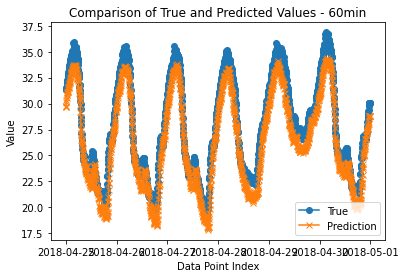

In [29]:
import matplotlib.pyplot as plt

# x축 데이터 생성 (데이터 포인트의 인덱스)
x = datetime_index

# 실제 값과 예측 값 비교를 위한 그래프
plt.plot(x, y_true_m, label='True', marker='o')  # 실제 값
plt.plot(x, y_pred_m, label='Prediction', marker='x')  # 예측 값

# 제목 및 레이블 추가
plt.title('Comparison of True and Predicted Values - 60min')
plt.xlabel('Data Point Index')
plt.ylabel('Value')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

### urban-mix